# **Tanzanian Water Wells Prediction**

---

### **Authors:** [JOSPHAT KIMANI ](https://github.com/lawsons254),

## 1. Business Understanding

### Problem Statement

The purpose of this project is to address the challenge faced by Wells of Life, an NGO operating in Tanzania, in effectively identifying water wells in need of repair. With over 57 million people struggling to access clean water, many existing water points require maintenance or have failed entirely. The problem statement revolves around the inefficiency in prioritizing maintenance efforts due to limited resources and the lack of a systematic approach to assess the condition of water wells. To tackle this issue, the project aims to develop a classifier that utilizes various data points such as pump type, installation date, and other relevant variables to predict the condition of water wells accurately. By doing so, Wells of Life can optimize their resource allocation, prioritize critical repairs, and intervene proactively to prevent disruptions in water supply, ultimately improving access to clean water for communities in Tanzania. 

 
### Specific Objectives


* Develop insights into trends and patterns distinguishing between non-functional and functional wells.
* Utilize straightforward analysis to pinpoint non-functioning wells and forecast well functionality based on available variables.


### Research Questions


* How can historical data accurately predict water well conditions?
* What challenges exist in predicting well conditions, and how can they be addressed?
* How does the classifier's performance compare to existing methods?
* hat insights can the classifier provide for decision-making and resource allocation?

### Success Metrics


* To ensure that newly constructed wells are of good quality water for the communities.
* To  correctly identify functionality of a well and determine its viability.
* Generating a model that will be able to correctly predict the quality status of the wells in Tanzania with an accuracy of 80%.

## 2. Data Understanding

> - Data Source


The provided dataset from Taarifa and the Tanzanian Ministry of Water is instrumental in predicting the functionality of water pumps in Tanzania. 


> - Describe Data


By analyzing various factors such as pump type, installation date, and management practices, the dataset allows for the classification of pumps into three categories: functional, in need of repair, or non-functional. This intermediate-level practice competition aims to leverage the dataset to enhance maintenance operations and ensure access to clean water for Tanzanian communities. A thorough understanding of the dataset's source, properties, and suitability for addressing the real-world problem is essential for developing accurate predictive models. Overall, the dataset presents an opportunity to apply machine learning techniques to improve water infrastructure management and enhance water accessibility in Tanzania.


##### Load Libraries

In [94]:
# Loading all the neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 40)
warnings.filterwarnings('ignore')

##### Load Data

In [95]:
# Loading well values as a pandas DataFrame
df_values = pd.read_csv("./Data/well_data_values.csv", index_col=0)

# Loading well labels as a pandas DataFrame
df_labels = pd.read_csv("./Data/well_data_labels.csv", index_col=0)

# Print shape of the two DataFrames
df_values.shape
df_labels.shape

# Create a combined DataFrame with both the value and label data joined on the 'id' column
data = df_values.join(df_labels, on='id')

data.shape

# Preview DataFrame
data.head(5)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [96]:
# View info of the dataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55763 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59398 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  war

In [97]:
# View Numerical Columns
numerical_columns = data.select_dtypes(include='number').columns

# View Categorical Columns
categorical_columns = data.select_dtypes(include='object').columns

The dataset contains 40 columns and 59,400 records. Here's a breakdown of the columns:

- **Numerical Columns (9)**
  - `amount_tsh`: Total static head (amount of water available)
  - `gps_height`: Altitude of the well
  - `longitude`: GPS coordinate (longitude)
  - `latitude`: GPS coordinate (latitude)
  - `num_private`: Unspecified numerical attribute
  - `region_code`: Geographic location code (region)
  - `district_code`: Geographic location code (district)
  - `population`: Population around the well
  - `construction_year`: Year the waterpoint was built

- **Categorical Columns (31)**
  - `date_recorded`: Date the data was recorded
  - `installer`: Organization that installed the well
  - `funder`: Organization that funded the well
  - `wpt_name`: Name of the waterpoint
  - `basin`: Geographic water basin
  - `subvillage`: Specific location within a village
  - `region`: Geographic region
  - `lga`: Local government area
  - `ward`: Administrative ward
  - `public_meeting`: Whether there was a public meeting about the well (True/False)
  - `recorded_by`: Group entering the data
  - `scheme_management`: Entity managing the waterpoint
  - `scheme_name`: Name of the waterpoint scheme
  - `permit`: Whether the waterpoint is permitted (True/False)
  - `extraction_type`: Method of water extraction
  - `extraction_type_group`: Group of water extraction methods
  - `extraction_type_class`: Class of water extraction methods
  - `management`: How the waterpoint is managed
  - `management_group`: Group of management methods
  - `payment`: Payment type for water
  - `payment_type`: Type of payment for water
  - `water_quality`: Quality of the water
  - `quality_group`: Grouped quality of the water
  - `quantity`: Quantity of water available
  - `quantity_group`: Grouped quantity of water available
  - `source`: Water source
  - `source_type`: Type of water source
  - `source_class`: Class of water source
  - `waterpoint_type`: Type of waterpoint
  - `waterpoint_type_group`: Grouped type of waterpoint
  - `status_group`: Condition of the wells (target variable)

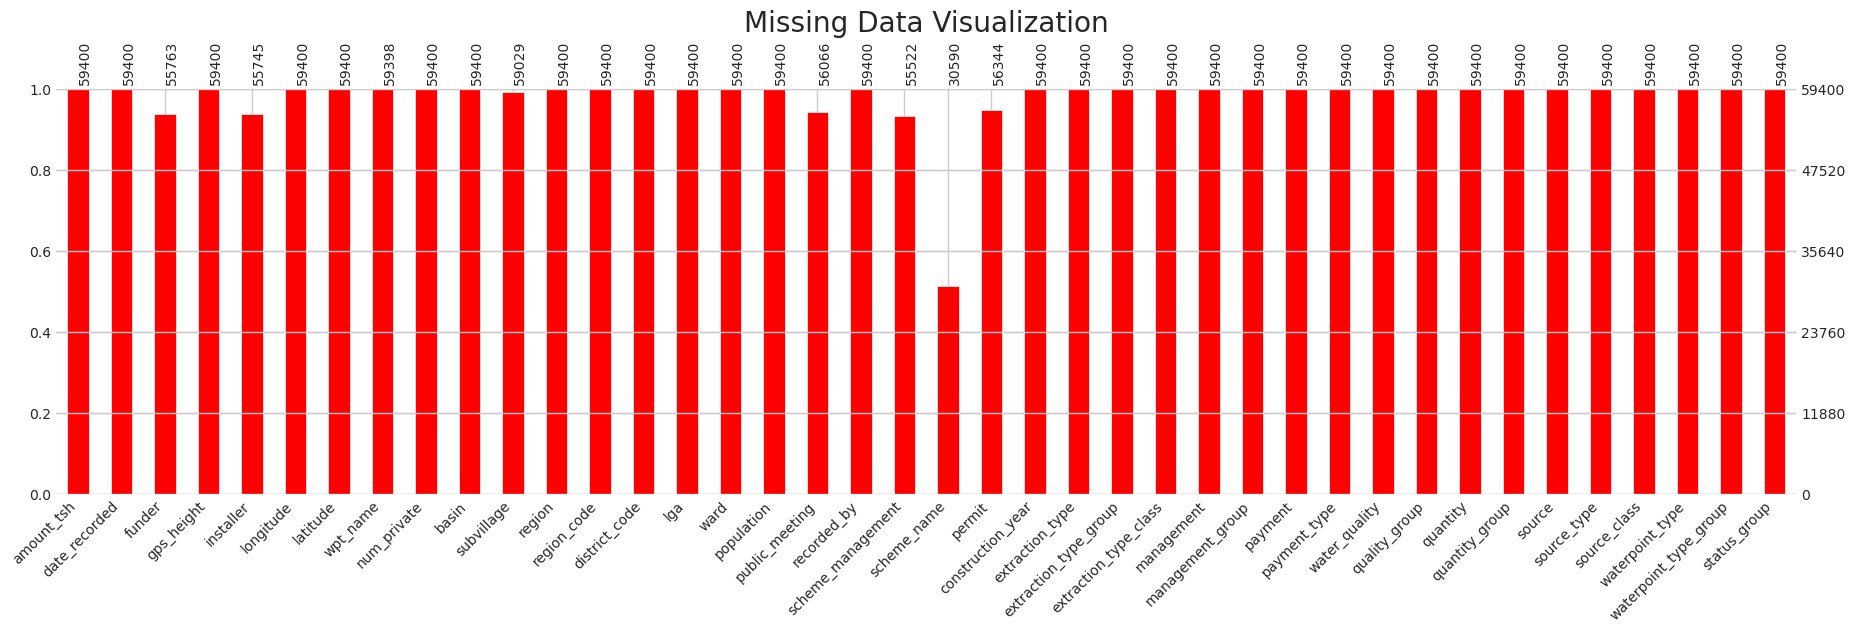

In [98]:


# Visualize missing data in the DataFrame
msno.bar(data, figsize=(20, 5), fontsize=10, color='red')
plt.title("Missing Data Visualization")
plt.xticks(rotation=90, fontsize=10)
plt.show()


While the dataset as a whole has relatively few missing values, the `scheme_name` column stands out with nearly half of its data missing.

In [99]:
# viewing numerical data
data.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The descriptive statistics table provides insights into the numerical attributes of the dataset, including measures of central tendency, variability, and distribution, offering a comprehensive overview of the data's characteristics.

## 3. Data Preparation
> This phase, commonly known as "data wrangling", involves preparing the dataset(s) for modeling by performing tasks such as:
> - Data selection
> - Data cleaning
> - Exploratory Data Analysis (EDA)

### 3.1 Data Selection
> In this section, the aim is to determine the columns from the dataset that will be utilized.

The evaluation will begin by assessing the similarity among the columns, as many of the 40 columns in the dataset appear to be related, before proceeding to evaluate the remaining columns.

#### 3.1.1 `scheme_management` | `management` | `management_group`

Within the context of the project, the columns `scheme_management`, `management`, and `management_group` all relate to the management of the well. An examination of their value counts will be conducted to ascertain the similarity of the data.

In [100]:
def display_value_counts(data, columns):
    """
    Display value counts of specified columns in a DataFrame.
    
    Parameters:
    - data: DataFrame
        The DataFrame containing the data.
    - columns: list
        A list of column names for which value counts are to be displayed.
    """
    for column in columns:
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")


In [101]:
# Define columns you want analyze
columns_to_analyze = ['scheme_management', 'management', 'management_group']

# Call display_value_counts function
display_value_counts(data, columns_to_analyze)


Value counts for scheme_management:
scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64


Value counts for management:
management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64


Value counts for management_group:
management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64




Considering the project's context, it's evident that `scheme_management` and `management` are closely associated, both concerning the management of wells. However, `management_group` seems unrelated to the other two columns and has fewer unique values.

Given the prevalence of missing values in `scheme_management` compared to `management`, it's more practical to utilize `management` for further analysis.

To explore the relationship between `management_group` and `management`, a groupby operation will be conducted on the pandas dataframe. This will help ascertain how different management groups correspond to various management types, providing valuable insights for the project.

In [102]:
# Create a duplicate DataFrame and drop scheme_management column
new_data = data.copy().drop(['scheme_management'], axis=1)

# Group by management_group column and management column
pd.DataFrame(new_data.groupby(['management_group', 'management']).size())

0
management_group management             
commercial       company             685
                 private operator   1971
                 trust                78
                 water authority     904
other            other               844
                 other - school       99
parastatal       parastatal         1768
unknown          unknown             561
user-group       vwc               40507
                 water board        2933
                 wua                2535
                 wug                6515

Since the "management_group" column has fewer different types compared to the "management" column, we're dropping the "management" column to keep things simpler. This helps avoid making our analysis and predictions too complicated, making it easier to understand and work with the data. By doing this, we still keep the important information about how wells are managed, but without unnecessary details that could confuse things.

In [103]:
# Drop management column
new_data = new_data.drop(['management'], axis=1)

#### 3.1.2 `extraction_type` | `extraction_type_group` | `extraction_type_class`

The columns `extraction_type`, `extraction_type_group`, and `extraction_type_class` all pertain to the type of extraction used. An assessment of their value counts will be conducted to determine the similarity of the data.

In [104]:
# Define columns to analyze
columns_to_analyze = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

# Call display_value_counts function
display_value_counts(data, columns_to_analyze)


Value counts for extraction_type:
extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64


Value counts for extraction_type_group:
extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other

it's noticeable that the "extraction_type" and "extraction_type_group" columns share similarities, representing various extraction methods. However, the "extraction_type_class" column appears unrelated to the other two, containing fewer unique values. Within the project context, it's apparent that these three columns redundantly convey information about extraction methods. Hence, we'll conduct a groupby operation on all three columns to assess their relationships and decide on the most suitable approach for analysis

In [105]:
# Group by extraction_type, extraction_type_group, and extraction_type_class
pd.DataFrame(new_data.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size())

0
extraction_type_class extraction_type_group extraction_type                 
gravity               gravity               gravity                    26780
handpump              afridev               afridev                     1770
                      india mark ii         india mark ii               2400
                      india mark iii        india mark iii                98
                      nira/tanira           nira/tanira                 8154
                      other handpump        other - mkulima/shinyanga      2
                                            other - play pump             85
                                            other - swn 81               229
                                            walimi                        48
                      swn 80                swn 80                      3670
motorpump             mono                  mono                        2865
                      other motorpump       cemo                          90
                                            climax                        32
other                 other                 other                       6430
rope pump             rope pump             other - rope pump            451
submersible           submersible           ksb                         1415
                                            submersible                 4764
wind-powered          wind-powered          windmill                     117

Given the analysis conducted, it's evident that the "extraction_type_group" column provides a more detailed classification of extraction methods compared to the "extraction_type_class" column. Additionally, "extraction_type_group" contains fewer unique values than the "extraction_type" column. Therefore, within the project's context, opting to utilize the "extraction_type_group" column allows for a balance between addressing the curse of dimensionality and retaining relevant information. This decision is informed by the need to streamline the dataset while preserving essential details about extraction methods.

In [106]:
# Drop extraction_type_class and extraction_type columns
new_data = new_data.drop(['extraction_type_class', 'extraction_type'], axis=1)

#### 3.1.3 `payment` | `payment_type`

The columns `payment` and `payment_type` both relate to monetary transactions. An examination of their value counts will be conducted to assess the similarity of data.

In [107]:
# define columns to analyze 
columns_to_analyze = ['payment', 'payment_type']

# Call display_value_counts function
display_value_counts(data,columns_to_analyze )


Value counts for payment:
payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64


Value counts for payment_type:
payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64




Since the `payment` and `payment_type` columns exhibit a perfect relationship, we'll remove the `payment` column as it contains more verbose information compared to the `payment_type` column.

In [108]:
# Drop payment column
new_data = new_data.drop(['payment'], axis=1)

#### 3.1.4 `water_quality` | `quality_group`

The `water_quality` and `quality_group` columns both pertain to the quality of water from the well. We will assess their value counts to determine the similarity of data.

In [109]:
# Define columns to analyze
columns_to_analyze = ['water_quality', 'quality_group']

# Call display_value_counts function
display_value_counts(data, columns_to_analyze)


Value counts for water_quality:
water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64


Value counts for quality_group:
quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64




Given that the `water_quality` column has slightly more unique values compared to the `quality_group` column, though the disparity is not significant, we will drop the `quality_group` column due to its lower informational content.

In [110]:
# Drop the quantity_group column
new_data = new_data.drop(['quantity_group'], axis=1)

#### 3.1.6 `source` | `source_type` | `source_class`

The columns `source`, `source_type`, and `source_class` all pertain to the source of water from the well. We will assess their value counts to determine the similarity of data.

In [111]:
# Define columns to analyze
columns_to_analyze = ['source', 'source_type', 'source_class']

# Call display_value_counts function
display_value_counts(data, columns_to_analyze)


Value counts for source:
source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64


Value counts for source_type:
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64


Value counts for source_class:
source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64




Upon reviewing the value counts, we observe that the `source` column exhibits a greater diversity of unique values compared to the `source_type` column, and likewise, the `source_type` column contains more unique values than the `source_class` column. In the context of the project, we opt for the `source_type` column as it strikes a balance between reducing dimensionality and retaining relevant information. This choice is driven by the fact that the `source_type` column offers more detailed information than the `source_class` column while also presenting fewer unique values than the `source` column, thus aiding in simplifying the dataset without significant loss of information.

In [112]:
# Drop'source' and 'source_class' columns
new_data = new_data.drop(['source', 'source_class'], axis=1)

#### 3.1.7 `waterpoint_type` | `waterpoint_type_group`
The `waterpoint_type` and `waterpoint_type_group` are both related columns that talk about the type of the waterpoint. We shall begin by evaluating their value counts in order to check the similarity of data.

In [113]:
# Define the columns you want to analyze
columns_to_analyze = ['waterpoint_type', 'waterpoint_type_group']

# Call the display_value_counts function
display_value_counts(data, columns_to_analyze)


Value counts for waterpoint_type:
waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64


Value counts for waterpoint_type_group:
waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64




Upon examining the value counts, it's evident that the `waterpoint_type` column encompasses a greater variety of unique values compared to the `waterpoint_type_group` column. In the context of the project, we opt to retain the `waterpoint_type` column due to its richer granularity of information compared to the `waterpoint_type_group` column. This decision is guided by the need to preserve detailed insights about waterpoint types while maintaining a manageable dataset.

In [114]:
# Drop waterpoint_type_group column
new_data = new_data.drop(['waterpoint_type_group'], axis=1)

#### 3.1.8 Dropping Unnecessary Columns | 

In [115]:
def drop_columns_and_print_reason(data, columns):
    """
    Drop specified columns from a DataFrame and print a message indicating the reason for dropping.

    Parameters:
    - data: DataFrame
        The DataFrame containing the data.
    - columns: list
        A list of column names to be dropped.
    """
    data.drop(columns=columns, axis=1, inplace=True)
    for column in columns:
        print(f"Dropped column '{column}' because it did not add any value to our analysis.")


In [116]:
columns_to_drop = ['longitude', 'latitude', 'wpt_name', 'num_private', 
                   'region_code', 'district_code', 'public_meeting', 
                   'recorded_by', 'scheme_name']

drop_columns_and_print_reason(new_data, columns_to_drop)


Dropped column 'longitude' because it did not add any value to our analysis.
Dropped column 'latitude' because it did not add any value to our analysis.
Dropped column 'wpt_name' because it did not add any value to our analysis.
Dropped column 'num_private' because it did not add any value to our analysis.
Dropped column 'region_code' because it did not add any value to our analysis.
Dropped column 'district_code' because it did not add any value to our analysis.
Dropped column 'public_meeting' because it did not add any value to our analysis.
Dropped column 'recorded_by' because it did not add any value to our analysis.
Dropped column 'scheme_name' because it did not add any value to our analysis.


We have now finalized the selection of columns for our analysis. We will proceed to clean the data using the following columns:

**Numerical Columns:**
- `gps_height`
- `population`
- `amount_tsh`
- `date_recorded`
- `construction_year`

**Categorical Columns:**
- `funder`
- `installer`
- `basin`
- `subvillage`
- `region`
- `lga`
- `ward`
- `scheme_management`
- `permit`
- `extraction_type_group`
- `payment_type`
- `management_group`
- `water_quality`
- `quantity`
- `source_type`
- `waterpoint_type`
- `status_group`

### 3.2 Data Cleaning

In this phase, we will address missing values and identify duplicate records within the dataset.

#### 3.2.1 visualizing the new Data set
> In this section, we will be looking at the missing values in the dataset.

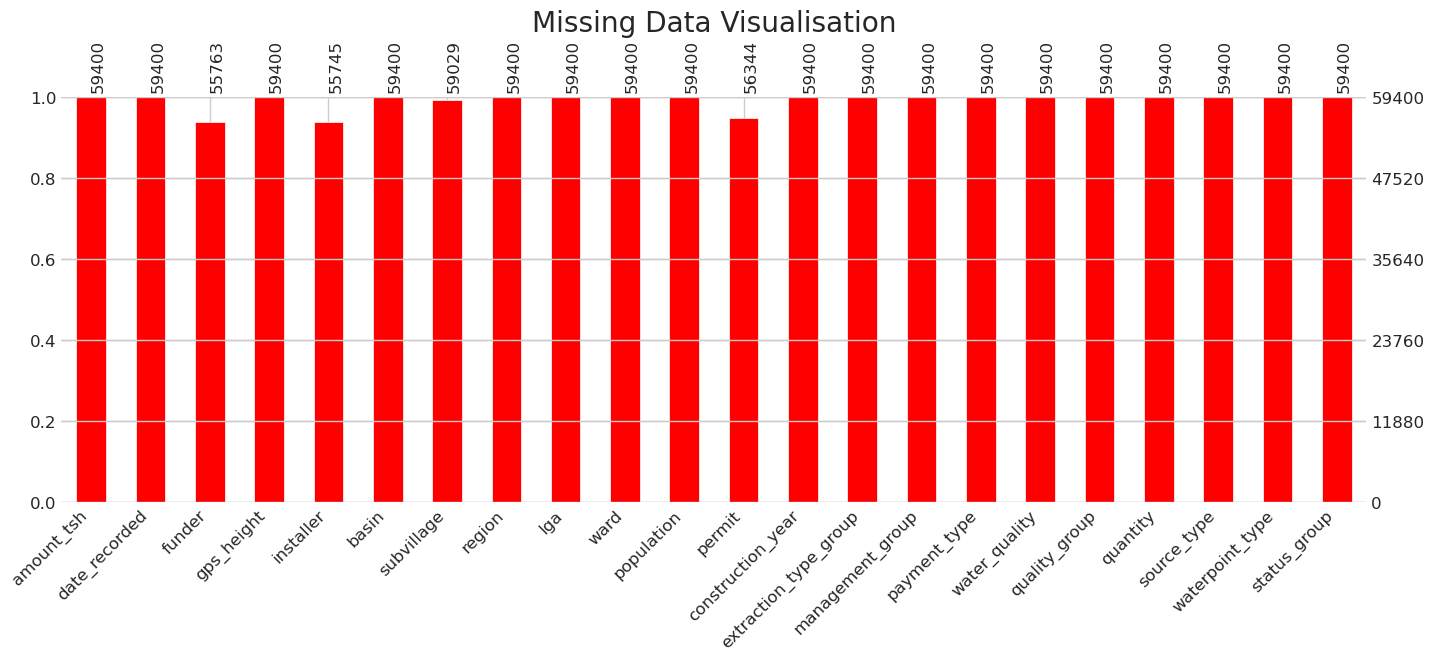

In [117]:
msno.bar(new_data, figsize=(15, 5), color='red', fontsize=12)
plt.title("Missing Data Visualisation")
plt.xticks(rotation=90)
plt.show()


Based on the visualization above, the following columns contain missing data:
- `funder`
- `installer`
- `subvillage`
- `permit`

In [118]:
print(new_data.columns)


Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'subvillage', 'region', 'lga', 'ward', 'population', 'permit',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')


In [119]:
def missing_values_summary(data, columns=None):
    """
    Calculate the total missing values and their percentages for specified columns in the DataFrame.

    Parameters:
    - data: DataFrame
        The DataFrame containing the data.
    - columns: list or None, optional (default=None)
        A list of columns to include in the summary. If None, all columns will be included.

    Returns:
    - summary: DataFrame
        A DataFrame summarizing the total missing values and their percentages for specified columns.
    """
    if columns is None:
        columns = data.columns
    total_missing = data[columns].isnull().sum()
    percent_missing = (total_missing / len(data)) * 100
    summary = pd.DataFrame({
        'Total Missing': total_missing,
        'Percentage Missing': percent_missing
    })
    summary = summary[summary['Total Missing'] > 0]  # Exclude columns with no missing values
    return summary


In [120]:
missing_values_summary(new_data, columns=['funder', 'installer', 'subvillage', 'permit'])


,Total Missing,Percentage Missing
funder,3637,6.122896
installer,3655,6.153199
subvillage,371,0.624579
permit,3056,5.144781


##### 3.2.1.1 Dropping Missing Values

In [121]:
def drop_columns_below_threshold(data, columns, threshold=7):
    """
    Drop rows from DataFrame if their missing percentage is below the specified threshold.

    Parameters:
    - data: DataFrame
         DataFrame containing the data.
    - columns: list
        A list of column names to be evaluated for dropping.
    - threshold: float, optional (default=7)
        threshold below which rows will be dropped.

    Returns:
    - data: DataFrame
        DataFrame with rows dropped if their missing percentage is below the threshold.
    """
    for column in columns:
        missing_percentage = (data[column].isnull().sum() / len(data)) * 100
        if missing_percentage < threshold:
            data = data[data[column].notna()]
    return data


In [122]:
# List of columns to evaluate
columns_to_evaluate = ['funder', 'installer', 'subvillage', 'permit']

# Drop columns if their missing percentage is below the threshold
new_data = drop_columns_below_threshold(new_data, columns_to_evaluate)

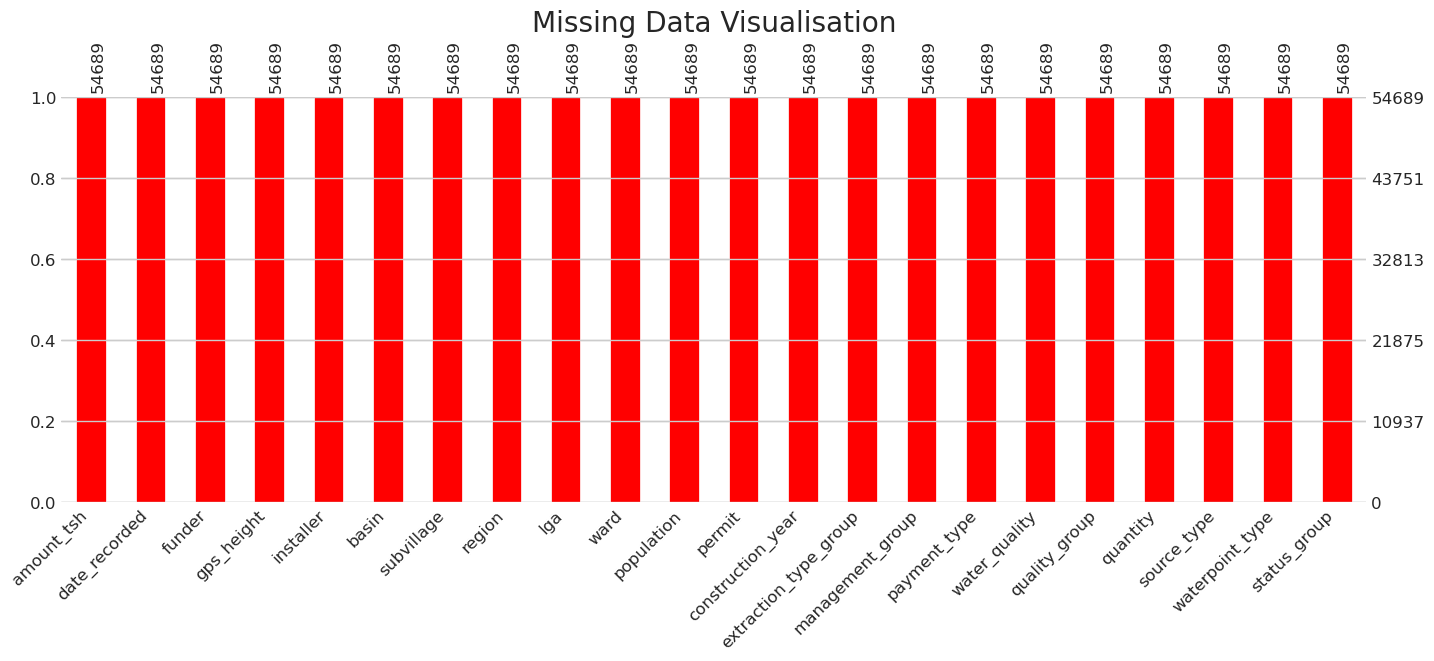

In [123]:
# Visualize the missing values in the new dataset
msno.bar(new_data, figsize=(15, 5), color='red', fontsize=12)
plt.title("Missing Data Visualisation")
plt.xticks(rotation=90)
plt.show()


#### 3.2.2 Check for Duplicates and Outliers

In [124]:
# Check for duplicated records
new_data[new_data.duplicated()]

,amount_tsh,date_recorded,funder,gps_height,installer,basin,subvillage,region,lga,ward,population,permit,construction_year,extraction_type_group,management_group,payment_type,water_quality,quality_group,quantity,source_type,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,,
59310,0.0,2011-07-18,Government Of Tanzania,0,Government,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,0,True,0,submersible,user-group,never pay,soft,good,insufficient,borehole,communal standpipe,functional
2296,0.0,2011-07-31,Kkkt_makwale,0,KKKT _ Konde and DWE,Lake Nyasa,Isimba,Mbeya,Kyela,Makwale,0,True,0,gravity,user-group,never pay,soft,good,enough,spring,communal standpipe,functional
53399,0.0,2011-07-23,Danida,0,Central government,Lake Nyasa,Malungo,Mbeya,Kyela,Mwaya,0,True,0,gravity,user-group,never pay,soft,good,dry,spring,communal standpipe,non functional
2859,0.0,2011-07-31,Kkkt_makwale,0,KKKT _ Konde and DWE,Lake Nyasa,Isimba,Mbeya,Kyela,Makwale,0,True,0,gravity,user-group,never pay,soft,good,enough,spring,communal standpipe,functional
70330,0.0,2011-04-12,Rc Church,0,RC Church,Lake Nyasa,Matwalani,Mbeya,Mbeya Rural,Ulenje,0,False,0,gravity,user-group,on failure,soft,good,enough,river/lake,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16666,0.0,2011-07-26,Md,0,DW,Lake Victoria,Kishoju 1,Kagera,Muleba,Nshamba,0,True,0,submersible,user-group,never pay,soft,good,enough,spring,communal standpipe,non functional
5064,0.0,2011-07-12,Hesawa,0,HESAWA,Lake Victoria,Mishenye,Kagera,Bukoba Rural,Buterankuzi,0,True,0,gravity,user-group,monthly,soft,good,enough,river/lake,communal standpipe,functional
47527,0.0,2011-04-12,Rc Church,0,RC Church,Lake Nyasa,Mjimwema,Mbeya,Mbeya Rural,Ulenje,0,False,0,gravity,user-group,on failure,soft,good,enough,river/lake,communal standpipe,functional


The presence of duplicated records in our dataset doesn't imply inaccuracies in the data. Rather, it suggests that multiple wells were constructed as part of the same project, resulting in identical features across these records.

##### 3.2.2.1 Outliers
We'll address outliers in the numerical columns relevant to our project, including:
- `amount_tsh`
- `gps_height`
- `population`
- `construction_year`

In [125]:
# Function to visualize outliers as a box plot.
def visualize_outliers(df, col, title):
    """
    This function visualizes the outliers and outputs boxplots
    """
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=col, data=df)
    plt.title(title, fontsize=15)
    plt.show()


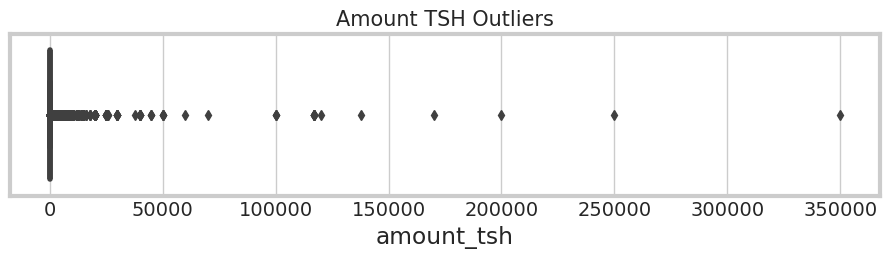

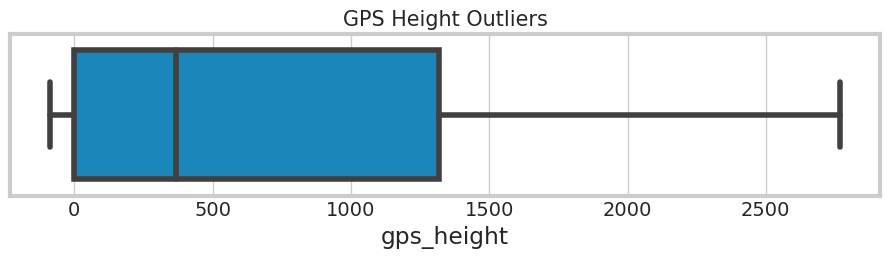

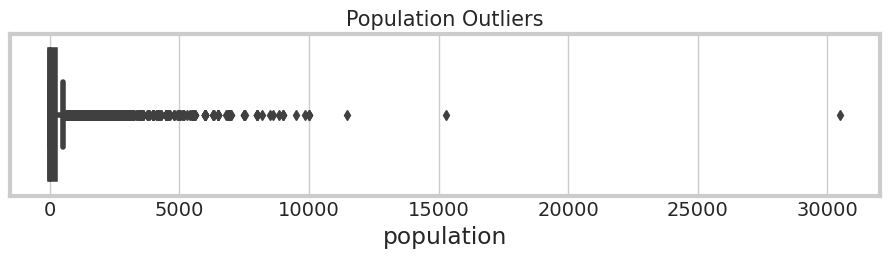

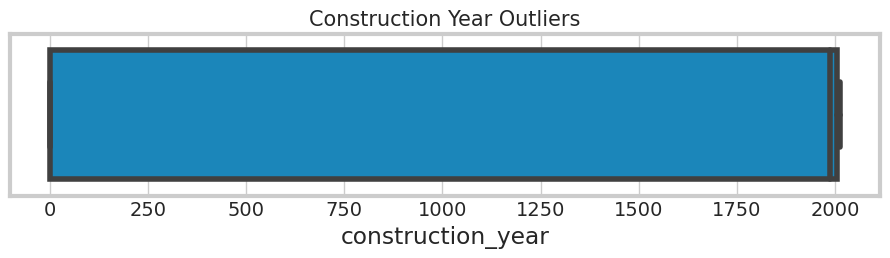

In [126]:
visualize_outliers(data, 'amount_tsh', 'Amount TSH Outliers')
visualize_outliers(data, 'gps_height', 'GPS Height Outliers')
visualize_outliers(data, 'population', 'Population Outliers')
visualize_outliers(data, 'construction_year', 'Construction Year Outliers')


In the boxplot of the total static head column, we observe outliers, but these values do not necessarily indicate erroneous data, as a total static head of even 250,000 is possible. Similarly, although the majority of data is clustered around 0, further investigation is needed to understand this distribution in univariate analysis.

Regarding the gps_height column, no outliers are present, indicating no need for outlier treatment. 

In the population column, outliers exist, yet they do not signify erroneous data, as populations of up to 30,000 near a well are plausible. This variable's values are region-dependent.

Concerning the construction year column, no outliers are evident. However, some nonsensical years may indicate data errors, warranting further investigation in univariate analysis. Overall, no outlier treatment is necessary for the construction year column.

#### 3.2.3 Uniformity
> In this section, we will be looking at the uniformity of the data. Uniformity refers to the consistency of the data with respect to the formatting, labelling. We will be looking at the following:
> - Labelling
> - Formatting

In [127]:
# function to rename columns
def rename_columns(df, col):
    """ 
    This function re-formats the column names to ensure that they are all in lower case and contain no spaces
    """
    new_col = col.strip().replace(' ', '_').lower()
    
    df.rename(columns = {col: new_col}, inplace = True)

    # Loop through all column names and reformat
for col in new_data.columns:
    rename_columns(new_data, col)

In [128]:
new_data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'subvillage', 'region', 'lga', 'ward', 'population', 'permit',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

In [129]:
# Rename 'lga' column to 'local_government_area'
new_data.rename(columns = {'lga': 'local_government_area'}, inplace = True)

new_data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'subvillage', 'region', 'local_government_area', 'ward',
       'population', 'permit', 'construction_year', 'extraction_type_group',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

##### 3.2.3.2 Formatting

In [130]:
# function to to convert the columns to the appropriate data types
def convert_to_category(df, col):
    """
    This function converts the object categories to category data type
    """
    df[col] = df[col].astype('category')

# for loop to convert the object categoris to a category datatype
for col in new_data.select_dtypes(include='object').columns:
    convert_to_category(new_data, col)



In [131]:
import numpy as np

# Replace "0" values in the 'construction_year' column with NaN
new_data['construction_year'] = new_data['construction_year'].replace(0, np.nan)

# Convert the 'construction_year' column to datetime format
new_data['construction_year'] = pd.to_datetime(new_data['construction_year'], format='%Y')


### 3.2.4 Data Consistency Check
> This section focuses on assessing the consistency of the data.

We'll examine the consistency of the following columns:
- `installer`
- `subvillage`

In [132]:
def check_installer_consistency(data):
    """
    Check the consistency of the 'installer' column in the dataset.
    
    Parameters:
    data (DataFrame): The dataset containing the 'installer' column.
    
    Returns:
    list: A list of unique values in the 'installer' column.
    """
    unique_installers = data['installer'].unique()
    return unique_installers


In [133]:
print(new_data.columns)


Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'subvillage', 'region', 'local_government_area', 'ward',
       'population', 'permit', 'construction_year', 'extraction_type_group',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')


In [134]:
# Call the function to check consistency in the 'installer' column
installer_consistency = check_installer_consistency(new_data)
print(installer_consistency)


['Roman', 'GRUMETI', 'World vision', 'UNICEF', 'Artisan', ..., 'DWE/Anglican church', 'VIFAI', 'Dina', 'brown', 'SELEPTA']
Length: 2040
Categories (2040, object): ['-', '0', 'A.D.B', 'AAR', ..., 'wizara ya maji', 'world', 'world banks', 'world vision']


In [135]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

new_data['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

new_data['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
new_data['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

new_data['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                  'District Council','Council','Counc','District  Council','Distri'),
                                 value ='District council' , inplace=True)
new_data
new_data['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                   'RC CATHORIC',) , value ='RC Church' , inplace=True)

new_data['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                    'central government','Cental Government', 'Cebtral Government', 
                                  'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                    'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                    'Centra govt') , value ='Central government' , inplace=True)

new_data['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                      value ='world vision' , inplace=True)

new_data['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
new_data['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

new_data['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                    'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                    'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                    'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                    'Village Office','Village community members'),
                                     value ='villagers' , inplace=True)

new_data['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                      value ='Community' , inplace=True)
new_data['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

new_data['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [136]:
# continue to replacing spellin mistakes and getting together values
new_data['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
new_data['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
new_data['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
new_data['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
new_data['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
new_data['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
new_data['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
new_data['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
new_data['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
new_data['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [137]:
# Sub village

# Drop data that is less than 3 characters and more than 20 characters
new_data.drop(new_data[new_data['subvillage'].str.len() < 3].index, axis=0, inplace=True)

In [138]:
new_data[new_data['subvillage'].str.len() < 3]

,amount_tsh,date_recorded,funder,gps_height,installer,basin,subvillage,region,local_government_area,ward,population,permit,construction_year,extraction_type_group,management_group,payment_type,water_quality,quality_group,quantity,source_type,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,,


In [139]:
new_data.to_csv('wells_cleaned_data.csv', index=False)

### 3.3 Exploratory Data Analysis
> This section involves exploring the columns in the dataset. We will conduct:
> - Univariate Analysis
> - Bivariate Analysis
> - Multivariate Analysis

#### 3.4.1 Univariate Analysis
> This section focuses on exploring individual columns in the dataset to analyze their distributions and gather insights. We'll divide this analysis into two main parts:
>   - Categorical Columns Examination
>   - Numerical Columns Examination

In [140]:
categorical_columns = new_data.select_dtypes(include='object').columns
categorical_columns

Index([], dtype='object')

In [141]:
numerical_columns = new_data.select_dtypes(include='number').columns
numerical_columns

Index(['amount_tsh', 'gps_height', 'population'], dtype='object')

### Function to Both plot and get value counts of a column

In [142]:
import matplotlib.pyplot as plt

def get_value_counts(df, col):
    ''' 
    Returns the value counts of a column in a dataframe including NaN values, sorted in descending order.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
        col (str): The name of the column for which value counts are calculated.
        
    Returns:
        counts (Series): The value counts of the specified column.
    '''
    counts = df[col].value_counts(dropna=False)
    return counts

def plot_data(df, col, title):
    '''
    Plots the top 20 value counts of a column in a dataframe as a bar chart and provides a description of the plot.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        col (str): The name of the column to be visualized.
        title (str): The title of the plot.
    '''
    top_20_counts = get_value_counts(df, col).head(20)
    plt.figure(figsize=(10, 5))
    top_20_counts.plot(kind='bar', color='#037bfc', edgecolor='black', fontsize=10)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


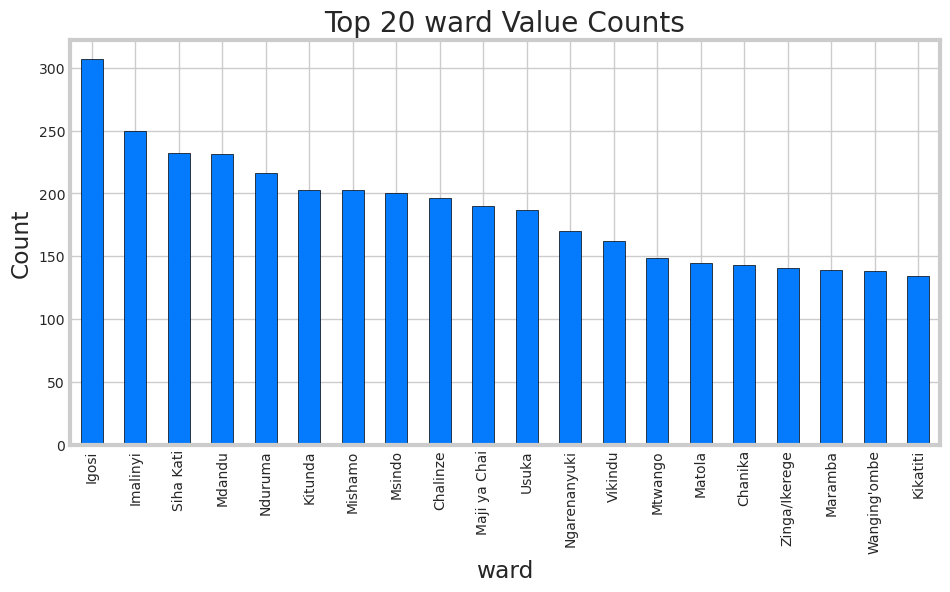

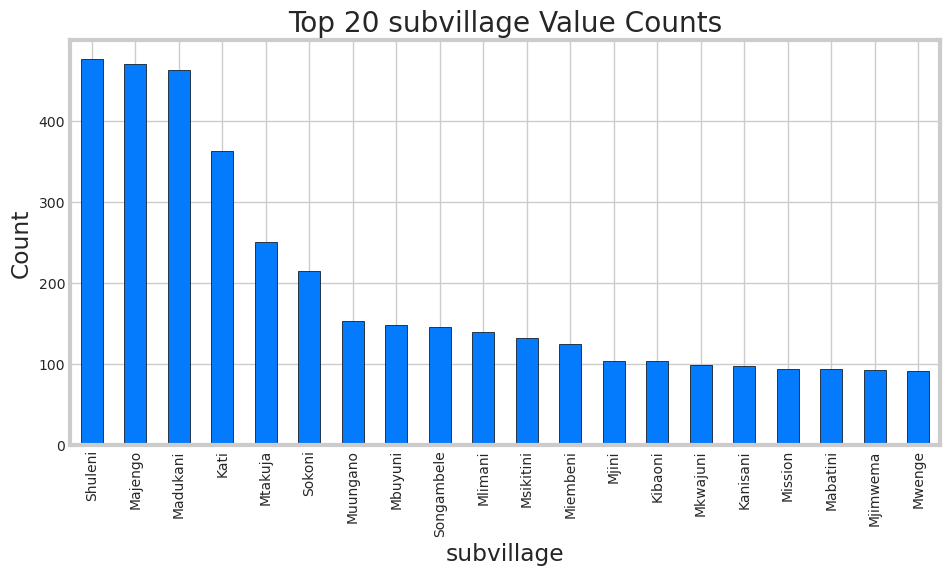

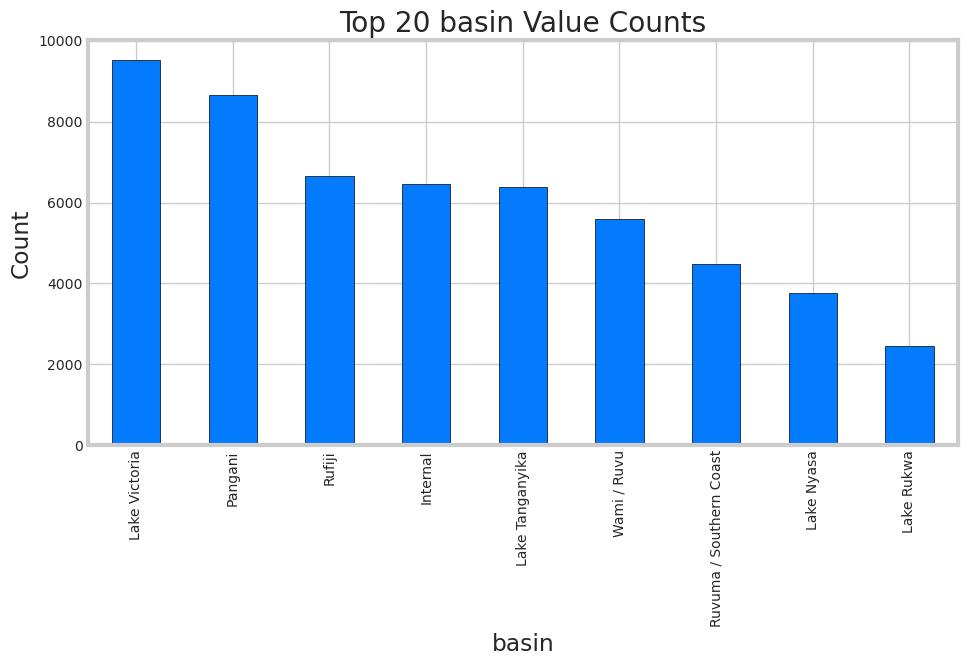

In [143]:
columns_to_plot = [ 'ward','subvillage',
                   'basin',]

for col in columns_to_plot:
    plot_data(new_data, col, f'Top 20 {col} Value Counts')


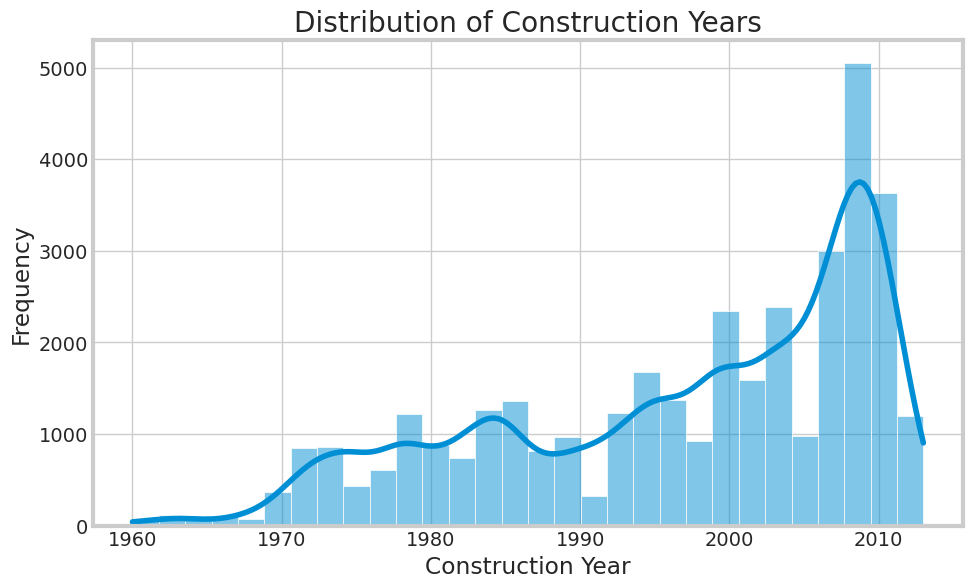

In [144]:
# Histogram for construction_year
plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='construction_year', bins=30, kde=True)
plt.title('Distribution of Construction Years')
plt.xlabel('Construction Year')
plt.ylabel('Frequency')
plt.show()

### 3.4.1.2 Analysis of Numerical Columns

In this subsection, we will focus on the analysis of the dataset's numerical columns. There are a total of four numerical columns, and we will conduct univariate analysis on each of them individually.

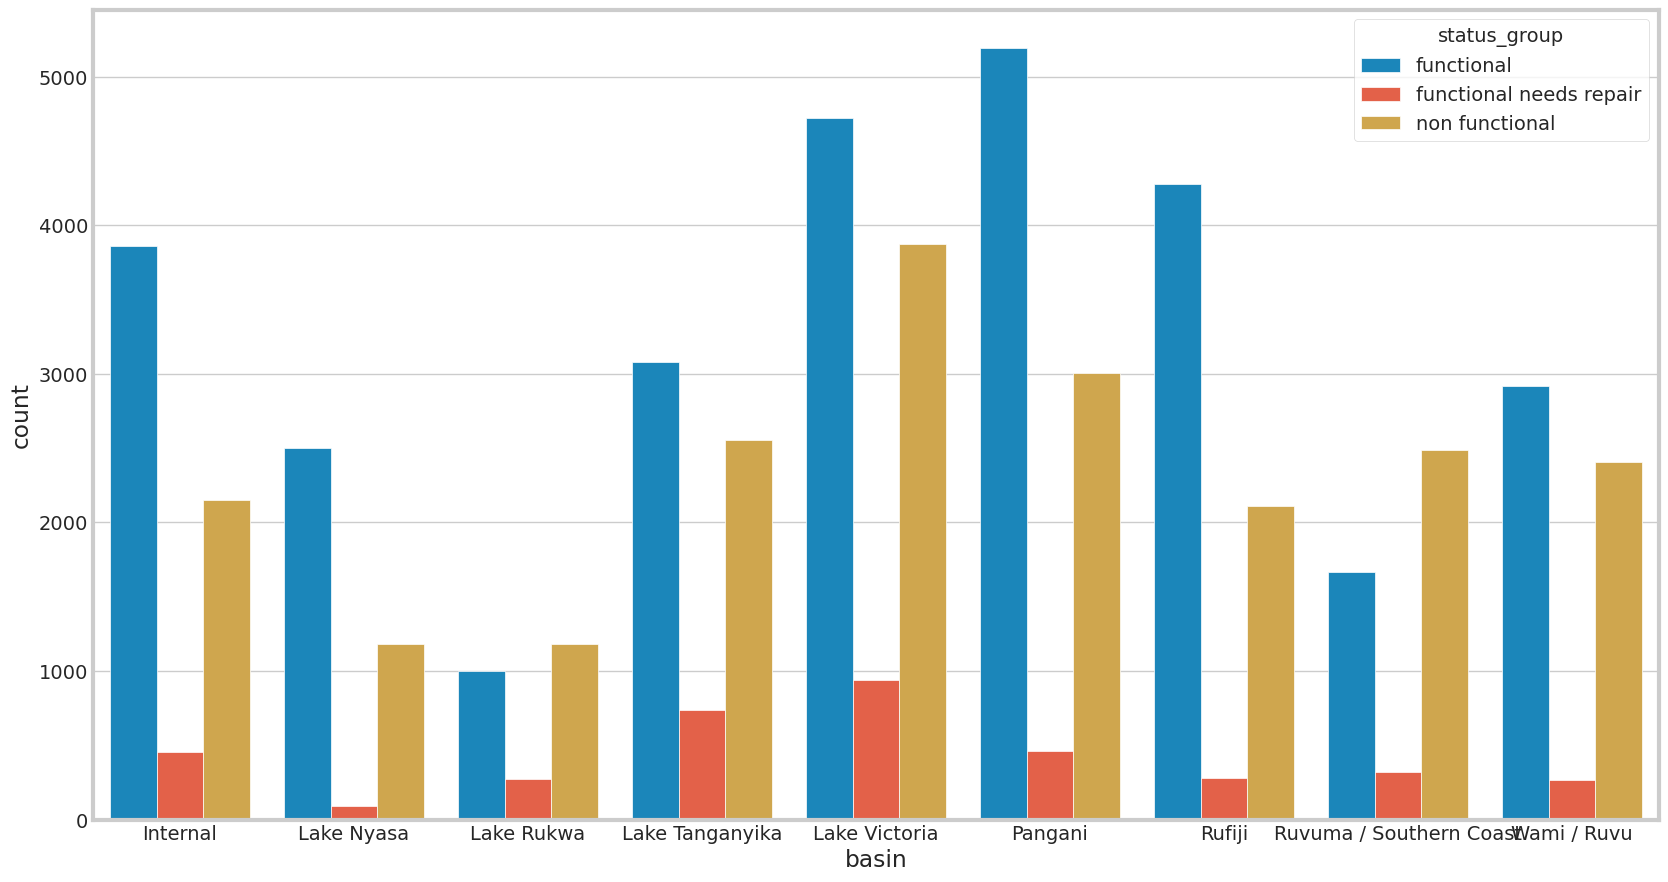

In [145]:
## Comparing basin and funcionality of wells columns
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="status_group", data=new_data)

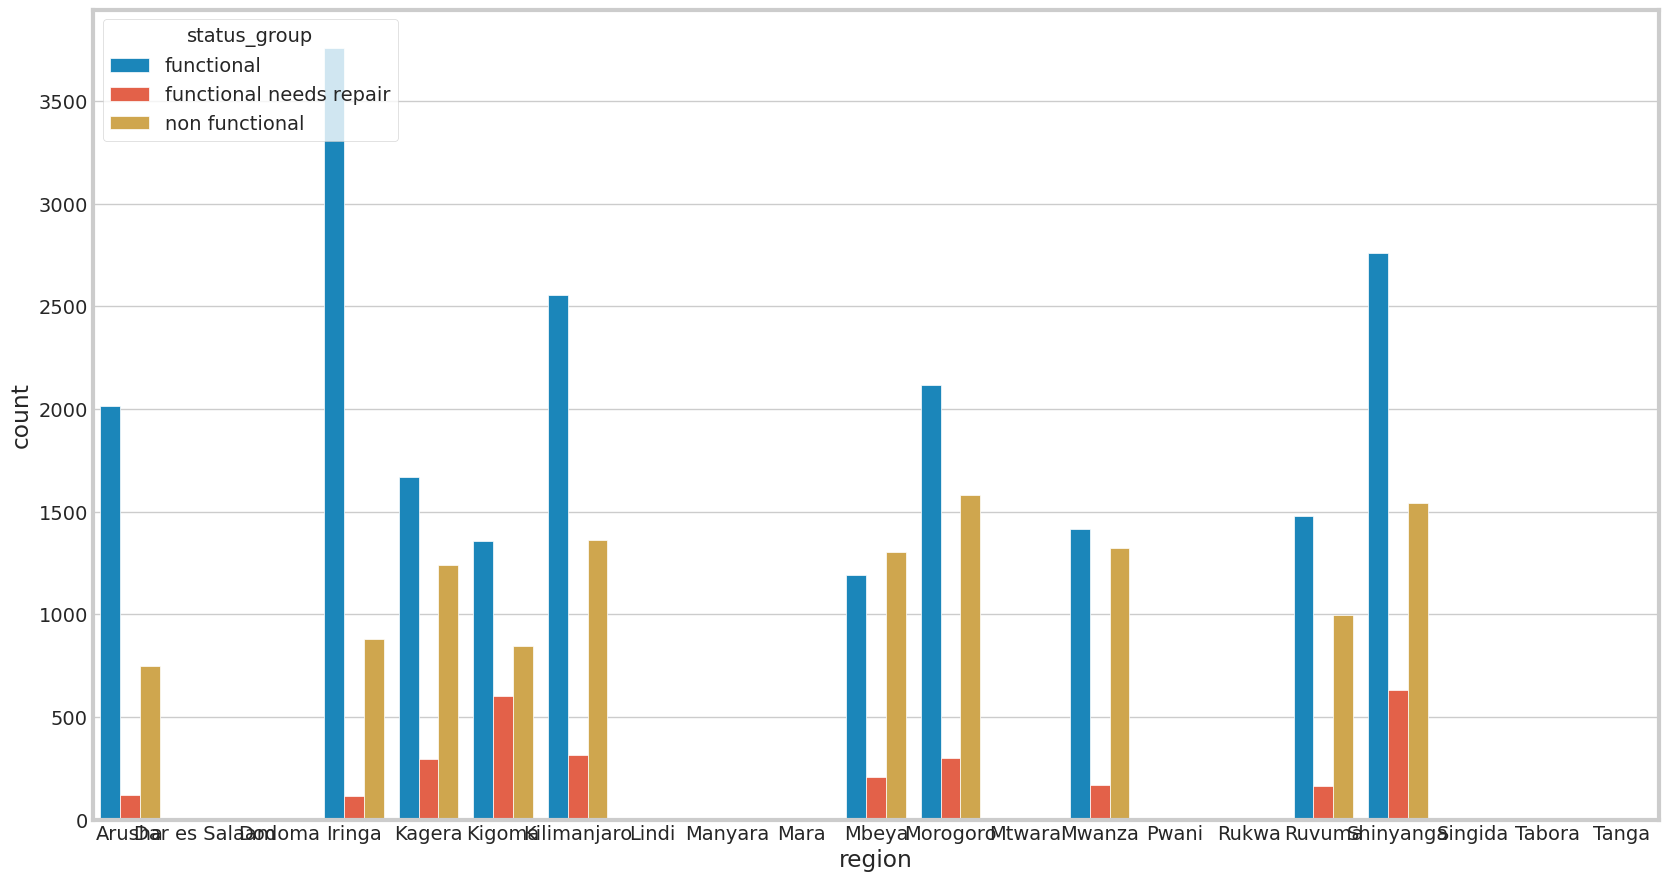

In [146]:
# Get the top 10 regions by count
top_regions = new_data['region'].value_counts().head(10).index

# Filter the data to include only the top 10 regions
filtered_data = new_data[new_data['region'].isin(top_regions)]

# Plot the countplot
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='region', hue='status_group', data=filtered_data)
plt.show()

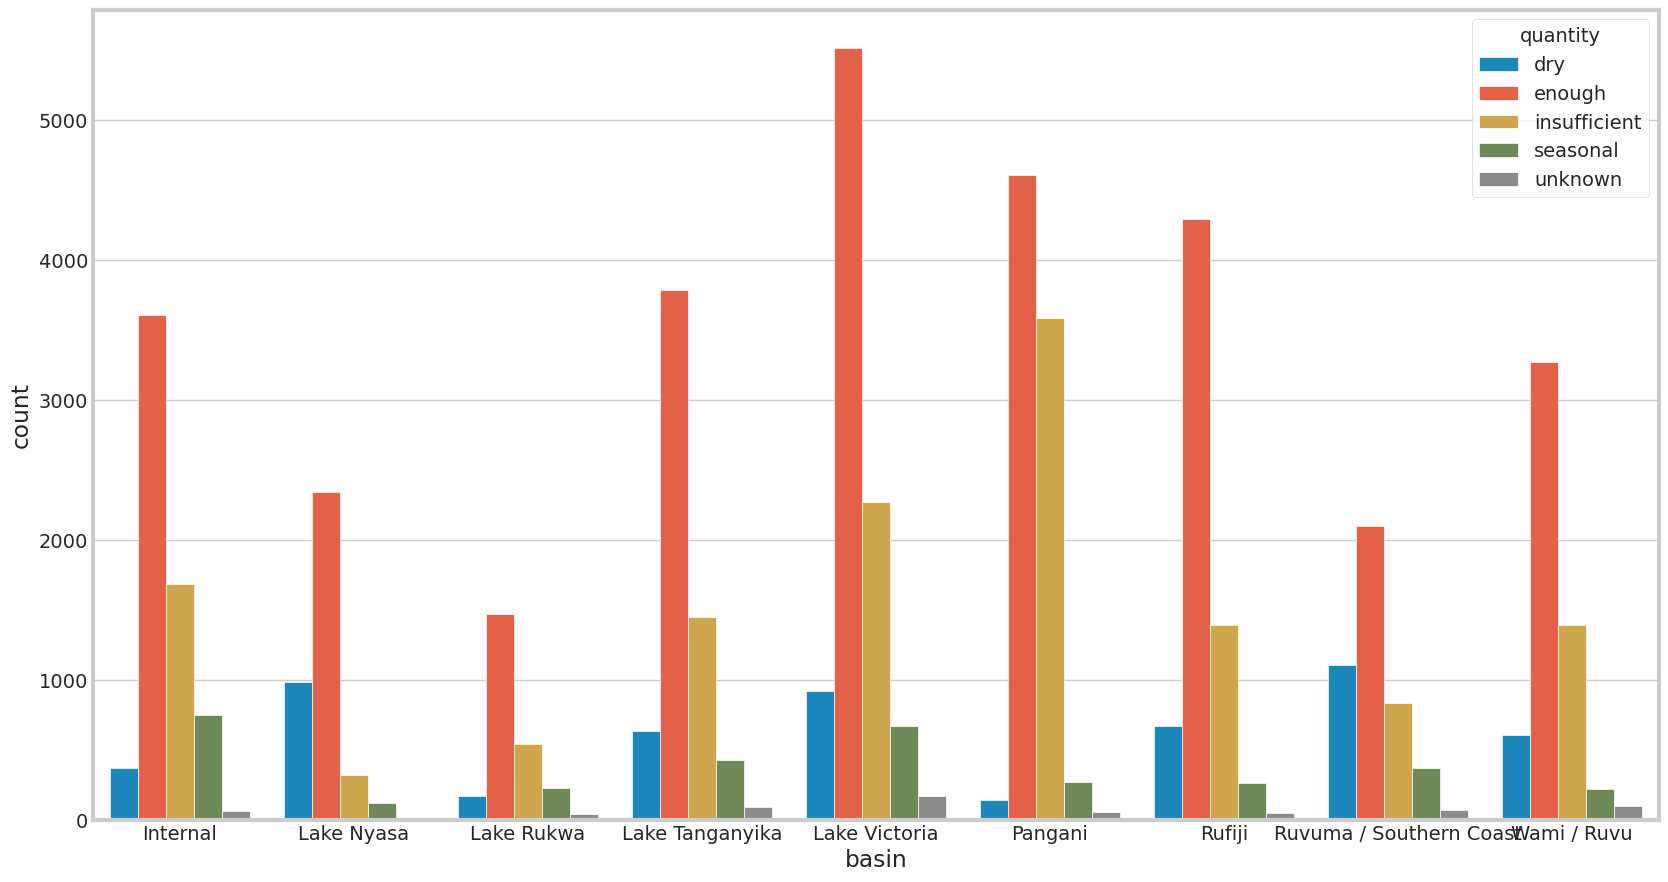

In [147]:
## Comparing between the basin and quantity of water 
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="quantity", data=new_data)

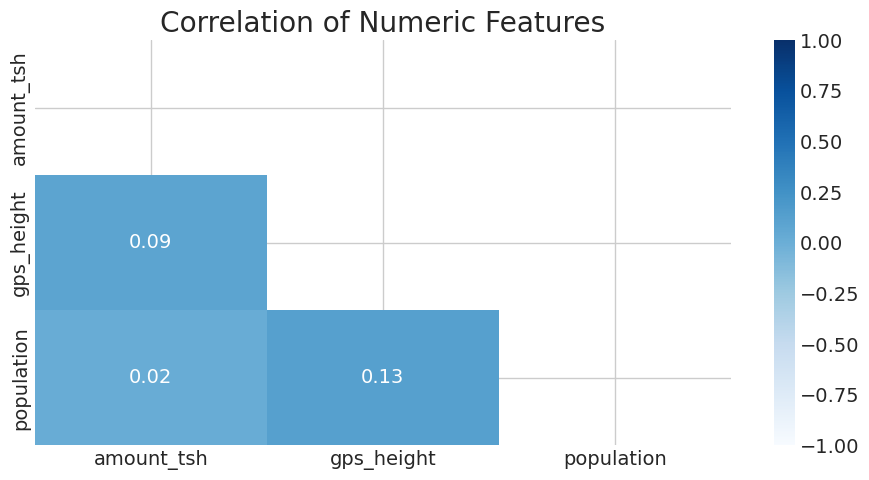

In [148]:


def corrmatrix(df):
    ''' This function plots a correlation matrix for numeric features in a given dataframe '''
    plt.figure(figsize=(10, 5))

    # Filter numeric columns
    numeric_cols = df.select_dtypes(include='number')

    # Calculate correlation matrix
    corr = numeric_cols.corr()

    # Generate a mask to only show the bottom triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate heatmap
    sns.heatmap(round(corr, 2), annot=True, mask=mask, vmin=-1, vmax=1, cmap='Blues')
    plt.title('Correlation of Numeric Features')
    plt.show()

# Call the function
corrmatrix(new_data)
